Taking a look at the Taxi data we're going to be using in the course

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
import pickle

In [155]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [156]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    categorical = ['PULocationID', 'DOLocationID']
    # numerical = ['trip_distance']
    df[categorical] = df[categorical].astype(str)

    return df

In [157]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df = df_train
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')
train_len = len(df_train)
val_len = len(df_val)

In [158]:
print(train_len/(train_len+val_len), val_len/(train_len+val_len))
print(f"train_len, val_len : {train_len}, {val_len}")

0.5441253340597368 0.4558746659402631
train_len, val_len : 73908, 61921


In [159]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [160]:
categorical = ['PU_DO'] #['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()
# Turns a dictionary into a vector

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE = 7.479545309801227 minutes


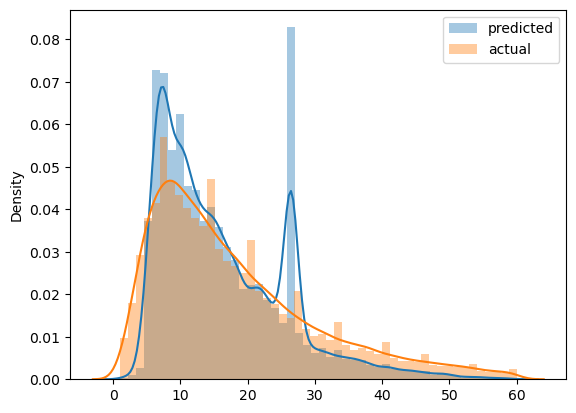

In [161]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

RMSE = mean_squared_error(y_val, y_pred, squared=False)
# squared = False gives RMSE
# RMSE is initially 9.8 minutes
# If we get rid of the categorical variables, RMSE goes up to 11.6 minutes

sns.distplot(y_pred, label='predicted')
sns.distplot(y_val, label='actual')
plt.legend()
print(f"RMSE = {RMSE} minutes")

In [162]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

RMSE = 11.167275941179728 minutes


/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


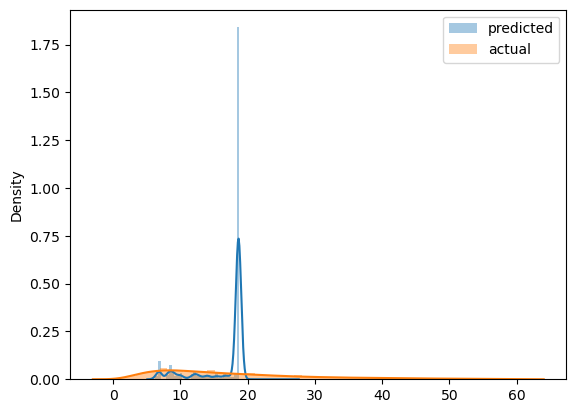

In [151]:
lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

RMSE = mean_squared_error(y_val, y_pred, squared=False)
# squared = False gives RMSE
# RMSE is initially 9.8 minutes
# If we get rid of the categorical variables, RMSE goes up to 11.6 minutes

sns.distplot(y_pred, label='predicted')
sns.distplot(y_val, label='actual')
plt.legend()
print(f"RMSE = {RMSE} minutes")

RMSE = 11.342603943257998 minutes


/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


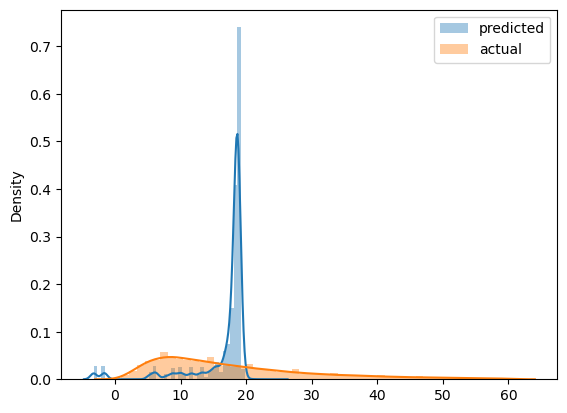

In [152]:
lr = Ridge()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

RMSE = mean_squared_error(y_val, y_pred, squared=False)
# squared = False gives RMSE
# RMSE is initially 9.8 minutes
# If we get rid of the categorical variables, RMSE goes up to 11.6 minutes

sns.distplot(y_pred, label='predicted')
sns.distplot(y_val, label='actual')
plt.legend()
print(f"RMSE = {RMSE} minutes")

In [74]:
df_train

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [27]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [30]:
df.duration

0         3.933333
1         8.750000
2         5.966667
3         7.083333
4         0.066667
           ...    
76513    38.000000
76514    38.000000
76515    11.000000
76516    27.000000
76517    10.000000
Name: duration, Length: 76518, dtype: float64

/Users/chadcasper/.pyenv/versions/miniforge3-4.10.3-10/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

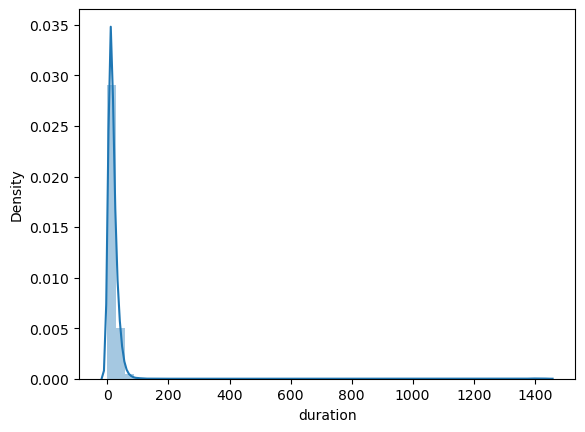

In [31]:
sns.distplot(df.duration)

In [32]:
df.duration.describe(percentiles=[.95, .98, .99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [33]:
max(df.duration)/60

23.993333333333332

Wow, max trip is almost 24 hours long lol.

In [34]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9658903787344154

Because these return a True/False array, taking a mean gets the average of 0's and 1s. Says more than half of the trips are between 1 min and 1 hour

In [35]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [36]:
len(df)

73908

In [39]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [40]:
df[categorical] = df[categorical].astype(str)

/var/folders/5g/ztyp6rl54tl1g18fgb56fvx80000gn/T/ipykernel_66525/1767203464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [57]:
df[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,43,151,1.01
1,166,239,2.53
2,41,42,1.12
3,168,75,1.99
7,75,75,0.45
...,...,...,...
76513,81,90,17.63
76514,35,213,18.36
76515,74,69,2.50
76516,168,215,14.48


In [66]:
dv.feature_names_
# These categorical variables are now one hot encoded

['trip_distance']

In [ ]:

y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

HOMEWORK #1

In [163]:
!wget -P data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
!wget -P data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2025-09-01 21:40:48--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:234c:8600:b:20a5:b140:21, 2600:9000:234c:a000:b:20a5:b140:21, 2600:9000:234c:ec00:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:234c:8600:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘data/yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  51.0MB/s    in 0.9s    

2025-09-01 21:40:49 (51.0 MB/s) - ‘data/yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]

--2025-09-01 21:40:49--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:234c:8600:b:20a5:b140:21, 2600:9000:234c:a000:b:20

In [250]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [251]:
print(len(df.columns))

19


HOMEWORK #2

In [252]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [253]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [254]:
df['duration'].mean()

Timedelta('0 days 00:15:40.139710039')

In [255]:
td = df['duration'].std()
minutes = td.total_seconds() / 60
print(minutes)

42.594351233333335


HOMEWORK #3

In [256]:
df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)
len_original = len(df)
incl = df[(df['duration'] > 1) & (df['duration'] <= 60)]
len_incl = len(incl)
print(f"Fraction of records left after removing outliers: {float(len_incl)/len_original}")

Fraction of records left after removing outliers: 0.9811286547457485


In [257]:
print(len(df), len(incl))

3066766 3008892


HOMEWORK #4

In [258]:
categorical = ['PULocationID', 'DOLocationID']
dv = DictVectorizer()
incl[categorical] = incl[categorical].astype(str)
yellow_train_dicts = incl[categorical].to_dict(orient='records')
X_train = dv.fit_transform(yellow_train_dicts)
X_train.toarray().shape

/var/folders/5g/ztyp6rl54tl1g18fgb56fvx80000gn/T/ipykernel_66525/761943077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incl[categorical] = incl[categorical].astype(str)


(3008892, 515)

HOMEWORK #5

In [259]:
lr = LinearRegression()
lr.fit(X_train, incl['duration'])
y_pred = lr.predict(X_train)
RMSE = mean_squared_error(incl['duration'], y_pred, squared=False)
print(f"RMSE = {RMSE} minutes")

RMSE = 7.648230348108508 minutes


HOMEWORK #6

In [263]:
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val['duration'] = df_val['duration'].apply(lambda td: td.total_seconds() / 60)
df_val = df_val[(df_val['duration'] > 1) & (df_val['duration'] <= 60)]
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.90,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.50,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN,19.000000
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN,11.133333
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN,14.000000
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN,7.000000


In [264]:
df_val[categorical] = df_val[categorical].astype(str)
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [265]:
y_pred = lr.predict(X_val)
RMSE = mean_squared_error(df_val['duration'], y_pred, squared=False)
print(f"RMSE = {RMSE} minutes")

RMSE = 7.810109207881548 minutes
